In [87]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
import seaborn as sns

from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, classification_report

from sklearn.linear_model import LogisticRegression

from sklearn.naive_bayes import GaussianNB

#Classificadores Lineares
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import LogisticRegression

#Classificadores KNN
from sklearn.neighbors import KNeighborsClassifier

#Classificadores Naive Nayes
from sklearn.naive_bayes import MultinomialNB

#Classificadores Arvores de Decisão
from sklearn.tree import DecisionTreeClassifier

#SVM
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split

from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, classification_report

from sklearn.preprocessing import StandardScaler

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import math

from sklearn import linear_model
from scipy.special import expit

from sklearn.metrics import confusion_matrix
import scipy
from scipy.io import arff

import numpy as np
from sklearn.datasets import fetch_olivetti_faces
from sklearn.svm import SVC
#from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline
#from sklearn.externals 
import joblib

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import KFold, cross_val_score, LeaveOneOut
from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score

import PIL
import os
from matplotlib.image import imread
import cv2
from sklearn import metrics
from scipy.spatial.distance import cdist

import seaborn as sns; sns.set()

from sklearn.cluster import DBSCAN

from itertools import product

# Buscando grupos em uma base de consumidores

In [18]:
mall_data = pd.read_csv('Mall_Customers.csv')

In [19]:
mall_data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [7]:
X_numerics = mall_data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Kmeans

In [8]:
n_clusters = [2,3,4,5,6,7,8,9,10] # number of clusters
clusters_inertia = [] # inertia of clusters
s_scores = [] # silhouette scores

for n in n_clusters:
    KM_est = KMeans(n_clusters=n, init='k-means++').fit(X_numerics)
    clusters_inertia.append(KM_est.inertia_)    # data for the elbow method
    silhouette_avg = silhouette_score(X_numerics, KM_est.labels_)
    s_scores.append(silhouette_avg) # data for the silhouette score method

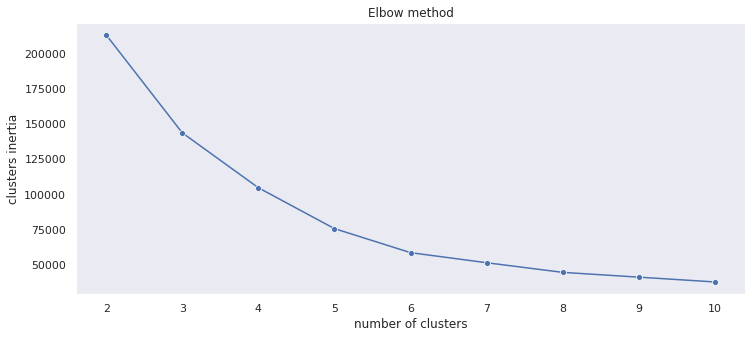

In [77]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(n_clusters, clusters_inertia, marker='o', ax=ax)
ax.set_title("Elbow method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("clusters inertia")
#ax.axvline(5, ls="--", c="red")
#ax.axvline(6, ls="--", c="red")
plt.grid()
plt.show()


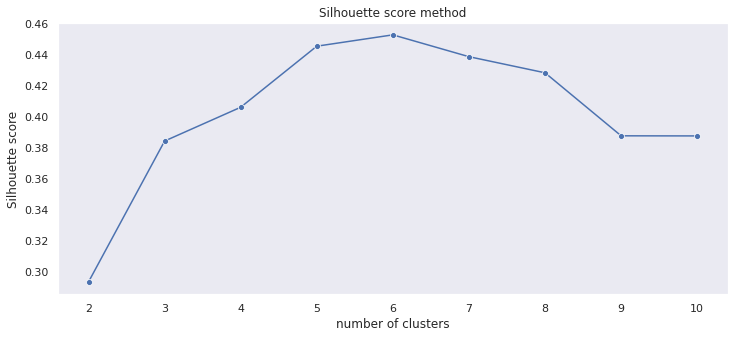

In [78]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(n_clusters, s_scores, marker='o', ax=ax)
ax.set_title("Silhouette score method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("Silhouette score")
#ax.axvline(6, ls="--", c="red")
plt.grid()
plt.show()

In [20]:
KM_5_clusters = KMeans(n_clusters=5, init='k-means++').fit(X_numerics) 
KM5_clustered = X_numerics.copy()
KM5_clustered.loc[:,'Cluster'] = KM_5_clusters.labels_ # append labels to points

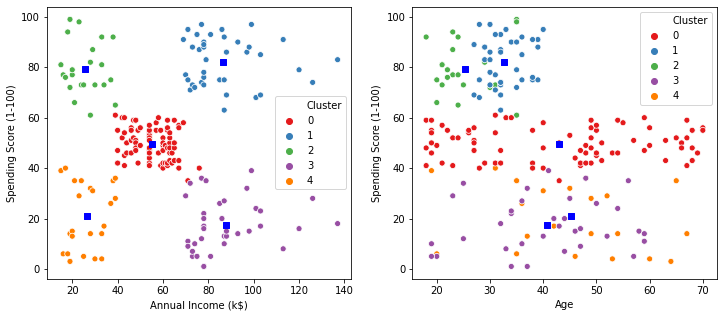

In [21]:
fig1, (axes) = plt.subplots(1,2,figsize=(12,5))


scat_1 = sns.scatterplot('Annual Income (k$)', 'Spending Score (1-100)', data=KM5_clustered,
                hue='Cluster', ax=axes[0], palette='Set1', legend='full')

sns.scatterplot('Age', 'Spending Score (1-100)', data=KM5_clustered,
                hue='Cluster', palette='Set1', ax=axes[1], legend='full')

axes[0].scatter(KM_5_clusters.cluster_centers_[:,1],KM_5_clusters.cluster_centers_[:,2], marker='s', s=40, c="blue")
axes[1].scatter(KM_5_clusters.cluster_centers_[:,0],KM_5_clusters.cluster_centers_[:,2], marker='s', s=40, c="blue")
plt.show()

In [22]:
KM_5_clusters.cluster_centers_

array([[42.9375    , 55.0875    , 49.7125    ],
       [32.69230769, 86.53846154, 82.12820513],
       [25.27272727, 25.72727273, 79.36363636],
       [40.66666667, 87.75      , 17.58333333],
       [45.2173913 , 26.30434783, 20.91304348]])

## O algoritmo K-Means gerou os 5 clusters a seguir:

* clientes com renda anual ** baixa ** e pontuação de gastos ** alta **
* clientes com renda anual ** média ** e pontuação de gastos ** média **
* clientes com renda anual ** alta **  e pontuação de gastos ** baixa **
* clientes com renda anual ** alta **  e ** alta ** pontuação de gastos
* clientes com renda anual ** baixa ** e pontuação de gastos ** baixa **

# DBScan

In [ ]:
# Testando parâmetros para o DBScan

In [12]:
eps_values = np.arange(8,12.75,0.25) 
min_samples = np.arange(3,10) 
DBSCAN_params = list(product(eps_values, min_samples))

In [13]:
no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(X_numerics)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(silhouette_score(X_numerics, DBS_clustering.labels_))

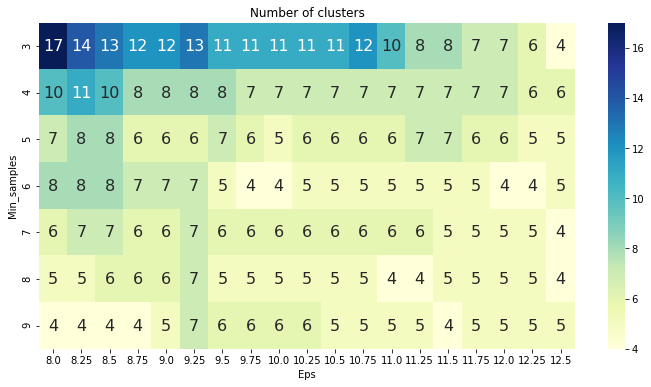

In [15]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['No_of_clusters'] = no_of_clusters

pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
plt.show()

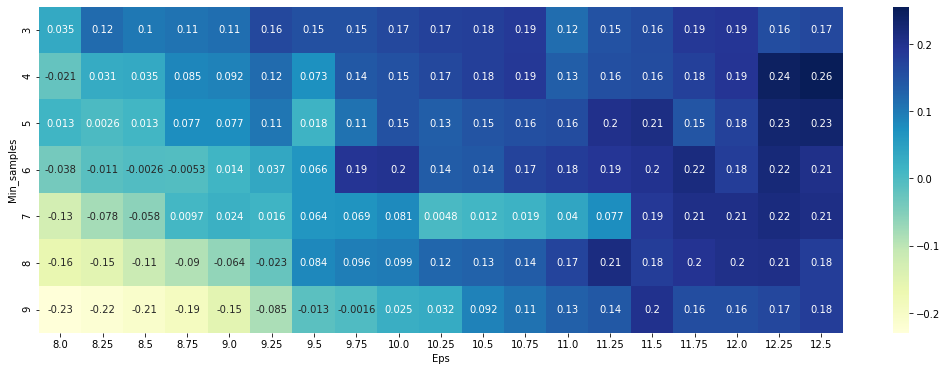

In [16]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['Sil_score'] = sil_score

pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()

# O valor mais alto de silhouete score foi com eps 12.5 e min_samples=4

In [23]:
DBS_clustering = DBSCAN(eps=12.5, min_samples=4).fit(X_numerics)

DBSCAN_clustered = X_numerics.copy()
DBSCAN_clustered.loc[:,'Cluster'] = DBS_clustering.labels_

In [24]:
DBSCAN_clust_sizes = DBSCAN_clustered.groupby('Cluster').size().to_frame()
DBSCAN_clust_sizes.columns = ["DBSCAN_size"]
DBSCAN_clust_sizes

,DBSCAN_size
Cluster,
-1,18
0,112
1,8
2,34
3,24
4,4


In [90]:
DBS_clustering

DBSCAN(eps=12.5, min_samples=4)

In [89]:
DBSCAN_clustered

,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,19,15,39,0
1,21,15,81,0
2,20,16,6,-1
3,23,16,77,0
4,31,17,40,0
...,...,...,...,...
195,35,120,79,-1
196,45,126,28,-1
197,32,126,74,-1
198,32,137,18,-1


In [109]:
for i in range (-1,5):
    aux=DBSCAN_clustered[DBSCAN_clustered['Cluster']==i]
    print(aux.describe())

             Age  Annual Income (k$)  Spending Score (1-100)  Cluster
count  18.000000           18.000000               18.000000     18.0
mean   36.944444           74.000000               44.944444     -1.0
std    12.316762           50.400747               36.752707      0.0
min    20.000000           16.000000                1.000000     -1.0
25%    32.000000           19.250000               13.250000     -1.0
50%    34.500000           89.500000               31.500000     -1.0
75%    36.500000          120.000000               77.750000     -1.0
max    67.000000          137.000000               99.000000     -1.0
              Age  Annual Income (k$)  Spending Score (1-100)  Cluster
count  112.000000          112.000000              112.000000    112.0
mean    39.142857           48.250000               52.339286      0.0
std     16.002735           15.557797               13.804656      0.0
min     18.000000           15.000000               26.000000      0.0
25%     24.0000

# Encontrando similaridade por distancia geográfica

In [85]:
df_target = pd.read_csv('target.csv', encoding='ISO-8859-1')
df_targets = pd.read_csv('targets.csv', encoding='ISO-8859-1')

In [30]:
df_targets

,@locale,Address.AddressLine1,Address.AddressLine2,Address.City,Address.CountryName,Address.County,Address.FormattedAddress,Address.IntersectionDescription,Address.Latitude,Address.Longitude,...,Is24Hours Sat,IsOpen Sat,Summary Sat,ThruTime Sat,BeginTime Sun,Is24Hours Sun,IsOpen Sun,Summary Sun,ThruTime Sun,AllCapability
0,en-US,400 Oxford Exchange Blvd,NaN,Oxford,United States,Calhoun,"400 Oxford Exchange Blvd, Oxford, AL 36203-3459",SEC I-20 & Golden Creek Rd,33.608825,-85.783182,...,False,True,8:00 a.m.-11:00 p.m.,23:00:00,8:00:00,False,True,8:00 a.m.-10:00 p.m.,22:00:00,"['CVS pharmacy', 'Café', 'Mobile Kiosk', 'Star..."
1,en-US,2640 Enterprise Dr,NaN,Opelika,United States,Lee,"2640 Enterprise Dr, Opelika, AL 36801-1511",NWC I-85 & Hwy 280,32.618108,-85.410636,...,False,True,8:00 a.m.-11:00 p.m.,23:00:00,8:00:00,False,True,8:00 a.m.-10:00 p.m.,22:00:00,"['CVS pharmacy', 'Cafe-Pizza', 'Fresh Grocery'..."
2,en-US,1129 S Park St,NaN,Carrollton,United States,Carroll,"1129 S Park St, Carrollton, GA 30117-4429",NWC US 27 & Hwy 166 Bypass,33.558920,-85.076473,...,False,True,8:00 a.m.-10:00 p.m.,22:00:00,8:00:00,False,True,8:00 a.m.-9:00 p.m.,21:00:00,NaN
3,en-US,555 Bullsboro Dr,NaN,Newnan,United States,Coweta,"555 Bullsboro Dr, Newnan, GA 30265-1045",SWC I-85 & Rte 34,33.392907,-84.758875,...,False,True,8:00 a.m.-11:00 p.m.,23:00:00,8:00:00,False,True,8:00 a.m.-10:00 p.m.,22:00:00,"['CVS pharmacy', 'Café', 'Fresh Grocery', 'Mob..."
4,en-US,1591 Bradley Park Dr,NaN,Columbus,United States,Muscogee,"1591 Bradley Park Dr, Columbus, GA 31904-3071",NEC Bradley Pk & JR Allen Pkwy,32.534649,-84.971073,...,False,True,8:00 a.m.-11:00 p.m.,23:00:00,8:00:00,False,True,8:00 a.m.-10:00 p.m.,22:00:00,"['CVS pharmacy', 'Café', 'Mobile Kiosk', 'Phot..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1824,en-US,22832 US Highway 281 N,NaN,San Antonio,United States,Bexar,"22832 US Highway 281 N, San Antonio, TX 78258-...",NEC Hwy 281 & Stone Oak Pkwy,29.653311,-98.445034,...,False,True,8:00 a.m.-12:00 a.m.,0:00:00,8:00:00,False,True,8:00 a.m.-11:00 p.m.,23:00:00,"['Bakery', 'CVS pharmacy', 'Cafe-Pizza', 'Deli..."
1825,en-US,135 Creekside Way,NaN,New Braunfels,United States,Comal,"135 Creekside Way, New Braunfels, TX 78130-6248",NEC I-35 & FM 483,29.730890,-98.073444,...,False,True,8:00 a.m.-12:00 a.m.,0:00:00,8:00:00,False,True,8:00 a.m.-11:00 p.m.,23:00:00,"['Accepts WIC', 'CVS pharmacy', 'Cafe-Pizza', ..."
1826,en-US,700 Barnes Dr,NaN,San Marcos,United States,Hays,"700 Barnes Dr, San Marcos, TX 78666-6187",NWC I-35 & McCarty Ln,29.846426,-97.970298,...,False,True,8:00 a.m.-12:00 a.m.,0:00:00,8:00:00,False,True,8:00 a.m.-11:00 p.m.,23:00:00,"['CVS pharmacy', 'Cafe-Pizza', 'Fresh Grocery'..."
1827,en-US,5188 Kyle Center Dr,NaN,Kyle,United States,Hays,"5188 Kyle Center Dr, Kyle, TX 78640-6137",SWC I-35 & Kyle Pkwy,30.011692,-97.864363,...,False,True,8:00 a.m.-11:00 p.m.,23:00:00,8:00:00,False,True,8:00 a.m.-10:00 p.m.,22:00:00,"['CVS pharmacy', 'Cafe-Pizza', 'Drive Up', 'Fr..."


In [31]:
# choose columns
df_target = df_target[['Name', 'Address.Latitude', 'Address.Longitude']]
df_target = df_target.set_index('Name')
df_target.head(10)

,Address.Latitude,Address.Longitude
Name,,
Oxford,33.608825,-85.783182
Opelika,32.618108,-85.410636
Carrollton,33.558920,-85.076473
Newnan,33.392907,-84.758875
Columbus,32.534649,-84.971073
Peachtree City,33.436865,-84.590146
Montgomery,32.360305,-86.160670
Douglasville,33.726106,-84.735376
Prattville,32.457557,-86.395508


In [32]:
coords = df_target.values

In [86]:
coords

array([[ 33.608825, -85.783182],
       [ 32.618108, -85.410636],
       [ 33.55892 , -85.076473],
       ...,
       [ 29.846426, -97.970298],
       [ 30.011692, -97.864363],
       [ 30.162592, -97.793568]])

# Definindo a distância para ser considerado core, de acordo com aspectos geograficos

In [122]:
# within 100 km
kms_per_radian = 6371.0088
epsilon = 300 / kms_per_radian
epsilon

0.04708830413167849

In [117]:
db = DBSCAN(eps = epsilon,
             min_samples = 3,
             algorithm = 'ball_tree',
             metric = 'haversine').fit(np.radians(coords))
cluster_labels = db.labels_
num_clusters = len(set(cluster_labels))

In [118]:
cluster_labels

array([ 0,  0,  0, ..., 22, 22, 22])

In [119]:
df_target['DBSCAN_labels'] = cluster_labels

In [120]:
df_target['DBSCAN_labels'].value_counts().sort_index()

-1      76
 0     483
 1       5
 2       9
 3       3
 4     320
 5      13
 6       8
 7       3
 8      10
 9     120
 10      3
 11      5
 12      6
 13      4
 14      6
 15     48
 16      3
 17      8
 18      4
 19     23
 20     22
 21     43
 22     33
 23      9
 24     36
 25      7
 26      5
 27     14
 28    162
 29     12
 30    117
 31      3
 32      3
 33     21
 34     12
 35     39
 36      4
 37      9
 38     72
 39      3
 40      4
 41      4
 42     26
 43      3
 44      6
Name: DBSCAN_labels, dtype: int64

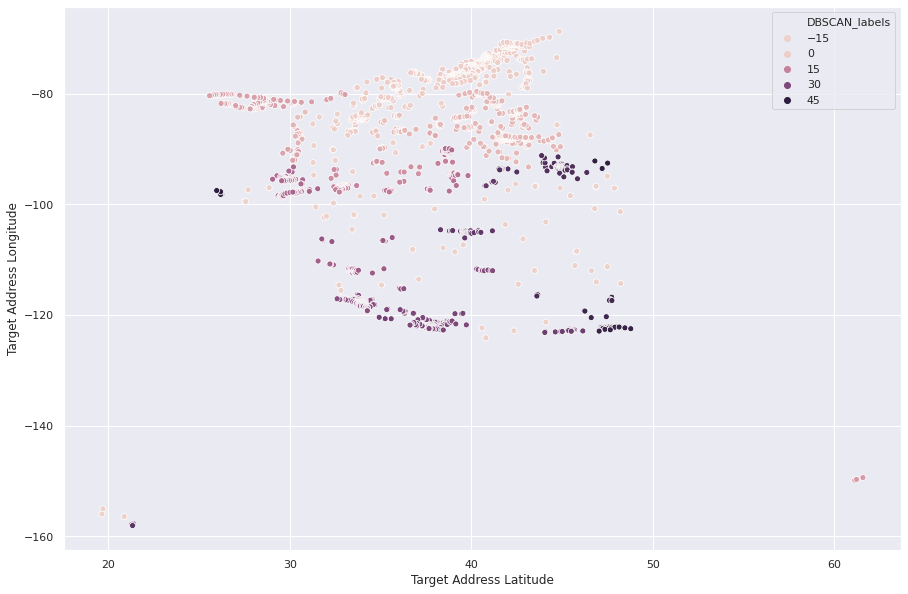

In [121]:



plt.figure(figsize = (15, 10))
ax = sns.scatterplot(x="Address.Latitude", 
                     y="Address.Longitude", 
                     hue="DBSCAN_labels",
                     data=df_target)
plt.xlabel('Target Address Latitude')
plt.ylabel('Target Address Longitude')
ax

### Quantificação de imagem com k-means

* A quantificação é uma técnica de compressão com perdas que consiste em agrupar toda uma gama de valores em um único. 

* Se quantificarmos a cor de uma imagem, reduzimos o número de cores necessárias para representá-la e o tamanho do arquivo diminui. 

# agrupando imagens por similaridade

In [80]:
df = pd.read_csv('train.csv.zip')

In [81]:
df

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.000000,0.000000,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.000000,0.000000,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.000000,0.000000,0.000000,0.020508,0.002930
3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.000000,0.000000,0.017578,0.000000,0.047852
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.031250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,1575,Magnolia_Salicifolia,0.060547,0.119140,0.007812,0.003906,0.000000,0.148440,0.017578,0.0,...,0.242190,0.000000,0.034180,0.000000,0.010742,0.000000,0.000000,0.000000,0.000000,0.018555
986,1578,Acer_Pictum,0.001953,0.003906,0.021484,0.107420,0.001953,0.000000,0.000000,0.0,...,0.170900,0.000000,0.018555,0.000000,0.011719,0.000000,0.000000,0.000977,0.000000,0.021484
987,1581,Alnus_Maximowiczii,0.001953,0.003906,0.000000,0.021484,0.078125,0.003906,0.007812,0.0,...,0.004883,0.000977,0.004883,0.027344,0.016602,0.007812,0.000000,0.027344,0.000000,0.001953
988,1582,Quercus_Rubra,0.000000,0.000000,0.046875,0.056641,0.009766,0.000000,0.000000,0.0,...,0.083008,0.030273,0.000977,0.002930,0.014648,0.000000,0.041992,0.000000,0.001953,0.002930


In [82]:
df.columns

Index(['id', 'species', 'margin1', 'margin2', 'margin3', 'margin4', 'margin5',
       'margin6', 'margin7', 'margin8',
       ...
       'texture55', 'texture56', 'texture57', 'texture58', 'texture59',
       'texture60', 'texture61', 'texture62', 'texture63', 'texture64'],
      dtype='object', length=194)

In [83]:
df['species'].unique().shape

(99,)

In [84]:
len1=200
len2=200
folder = "images/"

onlyfiles = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]

print("{0} imagens".format(len(onlyfiles)))

image = imread(folder + "/" + onlyfiles[0])
src = cv2.imread(folder + "/" + onlyfiles[i], cv2.IMREAD_UNCHANGED)
DB = cv2.resize(src, (len1, len2), interpolation=cv2.INTER_NEAREST)
DB=DB.reshape(1,len1*len2)

for i in range(1, len(onlyfiles)):
    
    image = imread(folder + "/" + onlyfiles[i])
    src = cv2.imread(folder + "/" + onlyfiles[i], cv2.IMREAD_UNCHANGED)
    resized_image = cv2.resize(src, (len1, len2), interpolation=cv2.INTER_NEAREST)

    resized_image = resized_image.reshape(1,len1*len2)
    
    DB=np.vstack((DB, resized_image))    
    
print(DB.shape)    

1584 imagens
(1584, 40000)


In [76]:
distortions = []

K = range(80,120)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(DB)
    kmeanModel.fit(DB)
    distortions.append(sum(np.min(cdist(DB, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / DB.shape[0])

    plt.plot(K, distortions, 'bx-')
    
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

KeyboardInterrupt: 

### Quantização de imagens
* Definindo imagem com menos cores - usando Kmeans

In [91]:
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")
china.shape

(427, 640, 3)

imshow -> plota um grafico bi dimensional, e para cada valor da matrix 2d, plota uma cor, calculada a partir do rgb

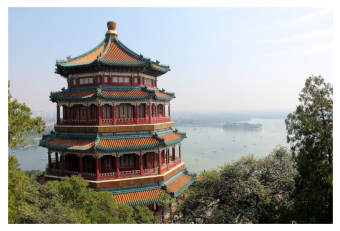

In [92]:
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(china);

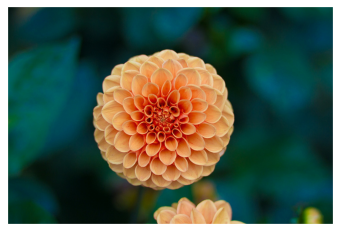

In [93]:
from sklearn.datasets import load_sample_image
flower = load_sample_image("flower.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(flower);

* É uma image de 427x640 pixels, sendo cada pixel três valores correspondente ao RGB

In [94]:
china.shape

(427, 640, 3)

* Os valores de RGB variam de 0 a 255. Dessa forma, os valores nessa matriz são entre 0 a 255, dividindo todo valor por 255, obtemos uma escala entre 0 a 1
* Em seguida os dados foram redimensionados, de 2D para 1D (apenas mudança de posição dos dados, não altera o conteúdo)

In [95]:
data = china / 255.0 # Refazendo para escala entre 0 a 1
data = data.reshape(427 * 640, 3) # transformando o formato de dados 2D para 1D, apenas mudança de representação
data.shape

(273280, 3)

In [96]:
print(data)

[[0.68235294 0.78823529 0.90588235]
 [0.68235294 0.78823529 0.90588235]
 [0.68235294 0.78823529 0.90588235]
 ...
 [0.16862745 0.19215686 0.15294118]
 [0.05098039 0.08235294 0.02352941]
 [0.05882353 0.09411765 0.02745098]]


### Função para plotar o valor de cada pixel em duas dimensões

In [97]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
    
    # choose a random subset
    rng = np.random.RandomState(0)
    print(rng)
    i = rng.permutation(data.shape[0])[:N]
    print(i)
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

RandomState(MT19937)
[101521 233130 175683 ...  21042  71188  28548]


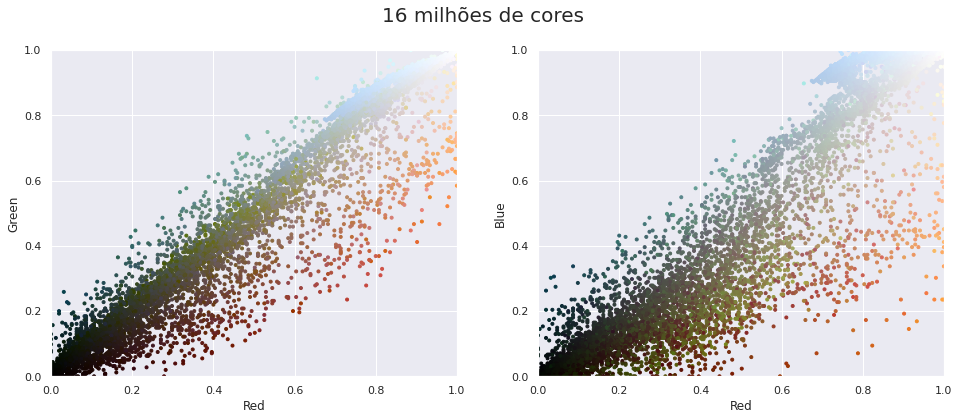

In [98]:
plot_pixels(data, title='16 milhões de cores')

### Usando Kmeans para encontrar 16 grupos
* O predict está sendo usado para colocar todos os itens em um dos 16 clusters

In [99]:
data

array([[0.68235294, 0.78823529, 0.90588235],
       [0.68235294, 0.78823529, 0.90588235],
       [0.68235294, 0.78823529, 0.90588235],
       ...,
       [0.16862745, 0.19215686, 0.15294118],
       [0.05098039, 0.08235294, 0.02352941],
       [0.05882353, 0.09411765, 0.02745098]])

In [100]:
from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)

kmeans.cluster_centers_

array([[0.28525469, 0.29671457, 0.26744462],
       [0.75191168, 0.84129443, 0.94193123],
       [0.59455318, 0.51739208, 0.33652458],
       [0.07110606, 0.06297075, 0.038624  ],
       [0.87176214, 0.91613435, 0.96566203],
       [0.60863278, 0.64540994, 0.62862041],
       [0.72030286, 0.75665464, 0.74716992],
       [0.50619431, 0.52992657, 0.48565231],
       [0.35385978, 0.17728958, 0.12007575],
       [0.8563805 , 0.60424809, 0.44054353],
       [0.35945163, 0.34674426, 0.15380322],
       [0.18145298, 0.17186859, 0.12909767],
       [0.80704518, 0.82700551, 0.84787847],
       [0.94901375, 0.96303305, 0.98703941],
       [0.43233523, 0.42357786, 0.31020452],
       [0.58851198, 0.30796296, 0.22203922]])

RandomState(MT19937)
[101521 233130 175683 ...  21042  71188  28548]


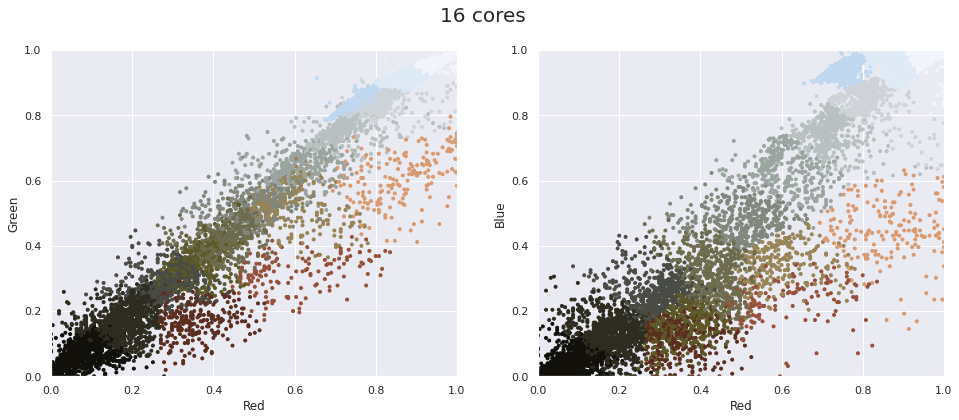

In [101]:
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,
            title="16 cores")


In [102]:
new_colors

array([[0.75191168, 0.84129443, 0.94193123],
       [0.75191168, 0.84129443, 0.94193123],
       [0.75191168, 0.84129443, 0.94193123],
       ...,
       [0.18145298, 0.17186859, 0.12909767],
       [0.07110606, 0.06297075, 0.038624  ],
       [0.07110606, 0.06297075, 0.038624  ]])

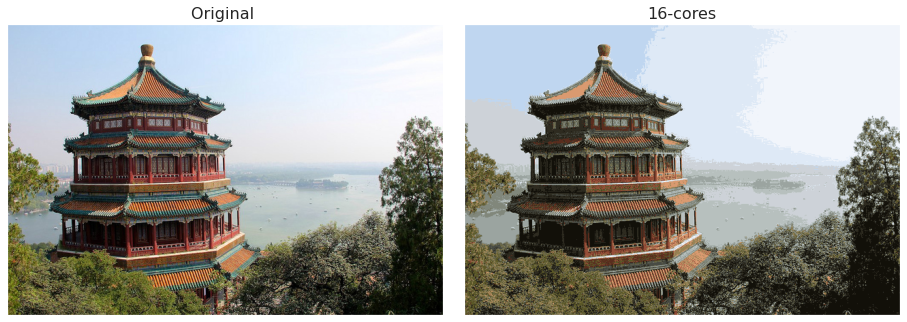

In [103]:
china_recolored = new_colors.reshape(china.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title('Original ', size=16)
ax[1].imshow(china_recolored)
ax[1].set_title('16-cores', size=16);